In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
np.random.seed(1)

#data = pd.read_csv("train.csv")
data = pd.read_csv("mnist_train.csv")
data = np.array(data)

In [13]:
m, n = data.shape

print(data.shape)

dataset = data[0 : m].T # The matrix is transposed because it becomes easier to get what the answer should be, since it is in the first position of the array
Y_train = dataset[0]
X_train = dataset[1:n]
X_train = X_train / 255.


(42000, 785)


In [14]:
def initialize_parameters():

    neurons_per_layer = 10
    input_first_neuron = 784

    W1 = np.random.rand(neurons_per_layer, input_first_neuron) - 0.5 # 10 x 784
    b1 = np.random.rand(neurons_per_layer, 1) - 0.5  # 10 x 1 

    W2 = np.random.rand(neurons_per_layer, neurons_per_layer) - 0.5  # 10 x 10
    b2 = np.random.rand(neurons_per_layer, 1) - 0.5 
    
    return W1, b1, W2, b2


In [15]:
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_propagation(X, W1, b1, W2, b2):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)

    Z2 = np.dot(W2, A1) + b2
    A2 = softmax(Z2)

    return Z1, A1, Z2, A2

In [16]:
def d_Relu(A):
    return np.where(A >= 0, 1, 0)


#check what number it is
def one_hot(Y):
    # Y.size = number of examples
    # Y.max() + 1 = number of helper classes, going from 0 to 10
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    #go to each row especified in Y and set its value to 1
    one_hot_Y[np.arange(Y.size), Y] = 1
    
    return (one_hot_Y.T)



def back_prop(X, Y, W1, W2, A1, A2, Z1, Z2):
    
    one_hot_Y = one_hot(Y)

    m = X.shape[1]

    dZ2 = A2 - one_hot_Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = np.dot(W2.T, dZ2) * d_Relu(Z1)
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

    return dW1,db1,dW2,db2


def update_params(W1,b1,W2,b2, dW1,db1,dW2,db2, learning_rate = 0.01):

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    return W1,b1,W2,b2


In [17]:
def compute_cost(A2, Y):
    m = Y.shape[0]
    cost = np.float64( (-1/m) * np.sum( np.multiply(Y, np.log(A2)) + np.multiply((1 - Y), np.log(1-A2))))

    return cost


In [35]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, num_iterations = 1, learning_rate = 0.10):
    W1, b1, W2, b2 = initialize_parameters()

    loss = []

    for i in range(num_iterations + 1):
        
        Z1, A1, Z2, A2 = forward_propagation(X, W1, b1, W2, b2)
        
        #cost = compute_cost(A2, Y)
       
        dW1,db1,dW2,db2 = back_prop(X, Y, W1, W2, A1, A2, Z1, Z2)

        W1,b1,W2,b2 = update_params(W1,b1,W2,b2, dW1,db1,dW2,db2, learning_rate)

        if( i % 10 == 0):
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            accuracy = get_accuracy(predictions, Y)
            loss.append(accuracy)
            print("\t", accuracy)
            loss.append(accuracy)

    return W1,b1,W2,b2, loss

W1,b1,W2,b2, loss = gradient_descent(X_train, Y_train, num_iterations=1000, learning_rate=0.10)

Iteration:  0
[9 2 2 ... 2 2 0] [1 0 1 ... 7 6 9]
	 0.09626190476190476
Iteration:  10
[9 8 6 ... 6 4 9] [1 0 1 ... 7 6 9]
	 0.17314285714285715
Iteration:  20
[9 0 6 ... 6 6 9] [1 0 1 ... 7 6 9]
	 0.2951190476190476
Iteration:  30
[1 0 1 ... 6 6 9] [1 0 1 ... 7 6 9]
	 0.4005952380952381
Iteration:  40
[1 0 1 ... 0 6 9] [1 0 1 ... 7 6 9]
	 0.4684047619047619
Iteration:  50
[1 0 1 ... 0 6 9] [1 0 1 ... 7 6 9]
	 0.5156904761904761
Iteration:  60
[1 0 1 ... 0 6 9] [1 0 1 ... 7 6 9]
	 0.558404761904762
Iteration:  70
[1 0 1 ... 7 6 9] [1 0 1 ... 7 6 9]
	 0.591047619047619
Iteration:  80
[1 0 1 ... 7 6 9] [1 0 1 ... 7 6 9]
	 0.6163809523809524
Iteration:  90
[1 0 1 ... 7 6 7] [1 0 1 ... 7 6 9]
	 0.6377380952380952
Iteration:  100
[1 0 1 ... 7 6 7] [1 0 1 ... 7 6 9]
	 0.6575238095238095
Iteration:  110
[1 0 1 ... 7 6 7] [1 0 1 ... 7 6 9]
	 0.6751190476190476
Iteration:  120
[1 0 1 ... 7 6 7] [1 0 1 ... 7 6 9]
	 0.6907619047619048
Iteration:  130
[1 0 1 ... 7 6 7] [1 0 1 ... 7 6 9]
	 0.703523

<function matplotlib.pyplot.show(close=None, block=None)>

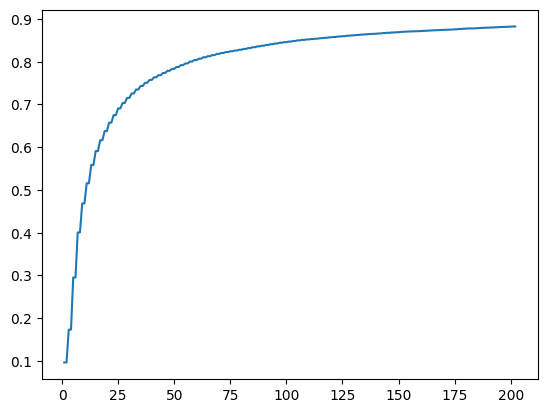

In [36]:
x = np.array( len(loss) )
x = [i for i in range(1, len(loss)+1)]
plt.plot(x, loss)
plt.show

Resultado encontrado pelo computador:  1
Resultado esperado:  1


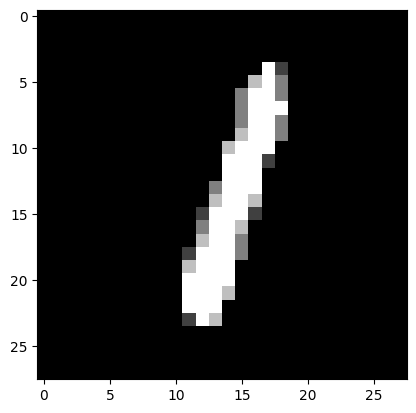

In [60]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(X, W1, b1, W2, b2)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Resultado encontrado pelo computador: ", prediction[0])
    print("Resultado esperado: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()


In [47]:
def save_parameters_csv(W1, b1, W2, b2):
    import csv
    file = open("parameters/W1.csv", 'w', newline='')
    writer = csv.writer(file)
    writer.writerows(W1)
    file.close()

    file = open("parameters/b1.csv", 'w', newline='')
    writer = csv.writer(file)
    writer.writerows(b1)
    file.close()

    file = open("parameters/W2.csv", 'w', newline='')
    writer = csv.writer(file)
    writer.writerows(W2)
    file.close()

    file = open("parameters/b2.csv", 'w', newline='')
    writer = csv.writer(file)
    writer.writerows(b2)
    file.close()

save_parameters_csv(W1, b1, W2, b2)

Resultado encontrado pelo computador:  2
Resultado esperado:  6


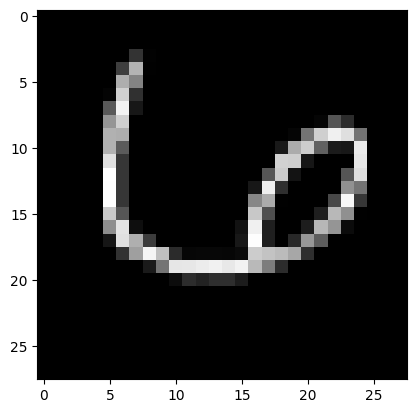

In [76]:
index = 2910

test_prediction( index, W1,b1,W2,b2)